In [1]:
!ls interpretation

interpretation_2qALU.h5  interpretation_hIgAv.h5  interpretation_tWq2I.h5
interpretation_alMiu.h5  interpretation_kyiHR.h5  interpretation_UFHSH.h5
interpretation_EhKs5.h5  interpretation_MEJQP.h5  interpretation_Yl7TL.h5
interpretation_G4nWf.h5  interpretation_RCf4o.h5


In [2]:
%matplotlib inline
import h5py
from matplotlib import pyplot as plt

interpretation_h5 = h5py.File("interpretation/interpretation_alMiu.h5", "r")

In [3]:
!ls sequences/

 bg.bed.gz			     positives.fa
 bg_minus_pos.bed.gz		     prefilt_positives.bed.gz
 concat_pos_and_neg.fa		     retained_motifs.log
 filtered_pos_enriched_motifs.meme   sim_negatives.txt.gz
 fimo_out			     sim_positives.txt.gz
'Investigate Sim.ipynb'		     test_sim_negatives.txt.gz
 negatives.fa			     test_sim_positives.txt.gz
 occupied_positions_histogram.png    train_sim_negatives.txt.gz
 peaks_and_bg.bed.gz		     train_sim_positives.txt.gz
 pos_enriched_motifs


In [4]:
import vakai
from vakai import util
sequences = [(x.decode('utf-8') if hasattr(x,'decode') else x)              
                  .rstrip().split("\t")[1] for x in                             
              util.open_fh("sequences/test_sim_positives.txt.gz")]                            
onehot_seqs = util.one_hot_encode(seqs=sequences)

deeplift-rcrs_ref:allzeros


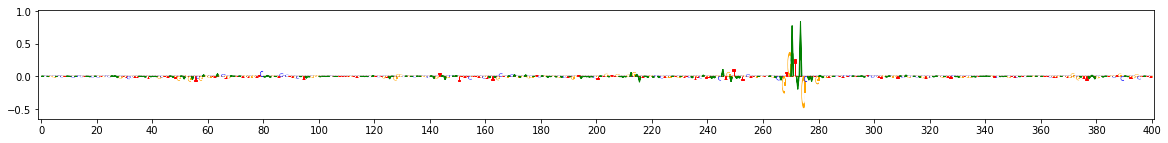

deeplift-rcrs_ref:avgc


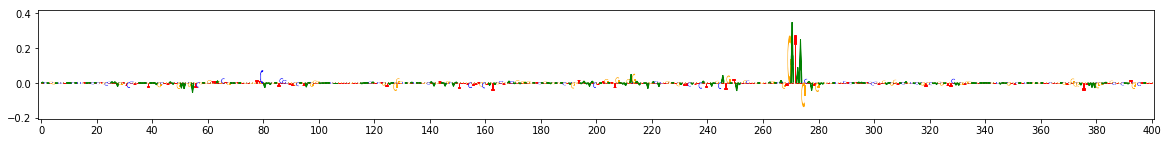

deeplift-rcrs_ref:shuff-10


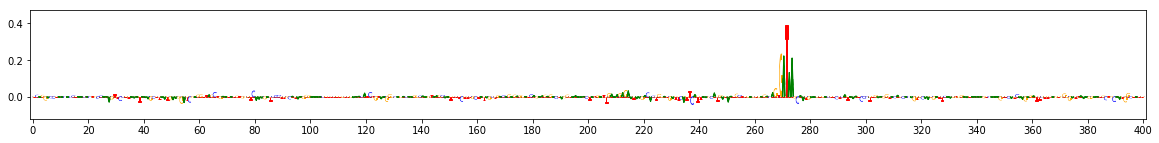

deeplift-rcrs_ref:shuff-20


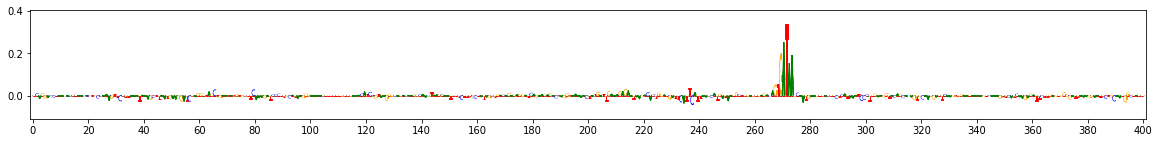

deeplift-rs_ref:allzeros


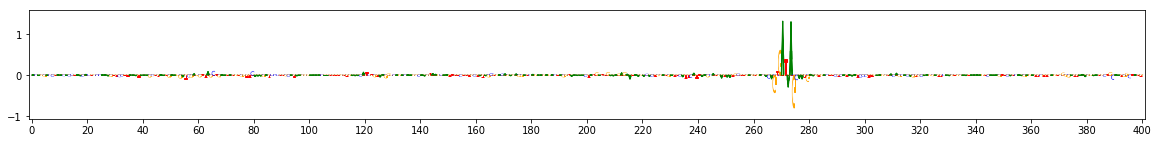

deeplift-rs_ref:avgc


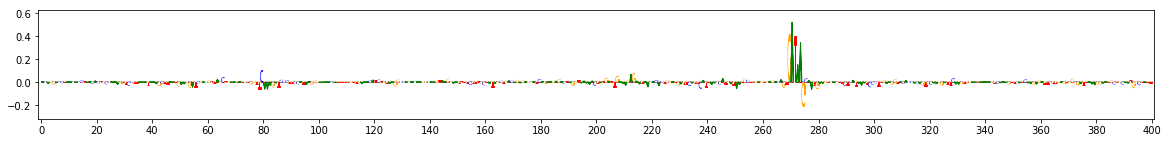

deeplift-rs_ref:shuff-10


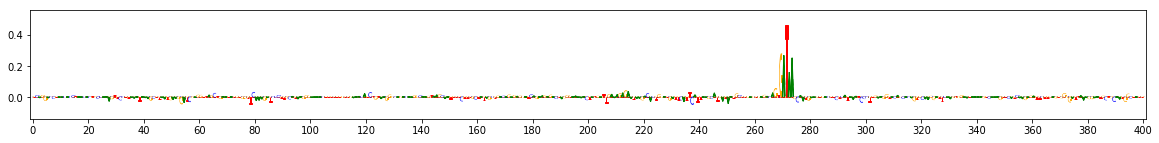

deeplift-rs_ref:shuff-20


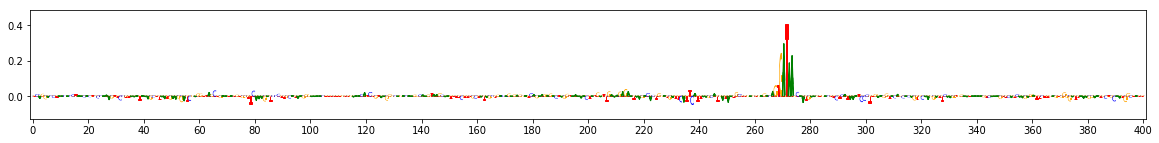

gradtimesinp_ref:allzeros


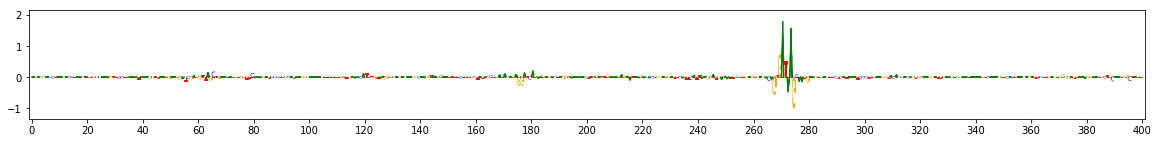

ig-10_ref:shuff-10


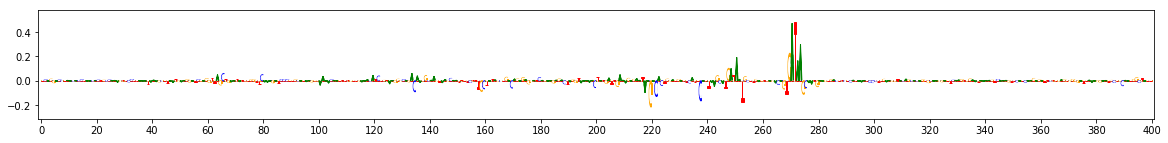

ig-10_ref:shuff-20


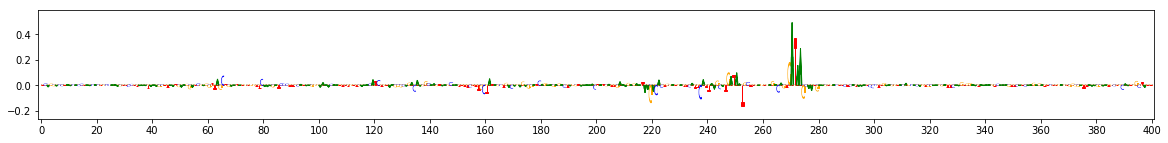

ig-20_ref:shuff-10


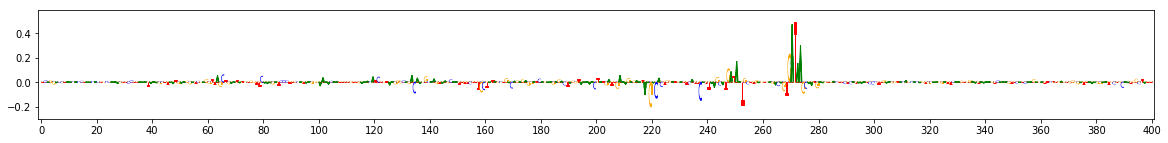

ig-20_ref:shuff-20


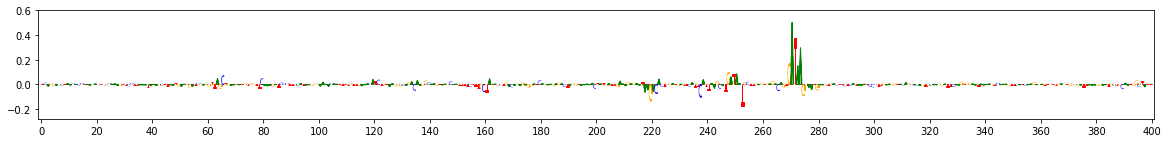

ism


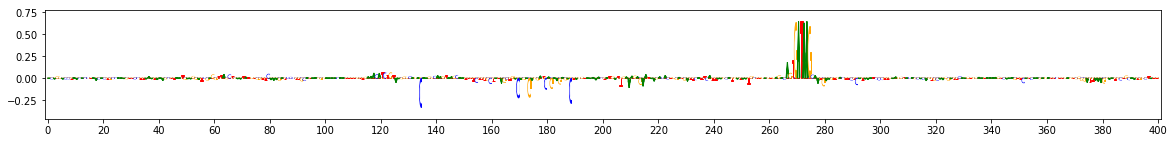

In [5]:
from deeplift.visualization import viz_sequence 
import numpy as np

seq_idx = 1
for key in sorted(interpretation_h5.keys()):
    if (key != "seqids"):
        print(key)
        viz_sequence.plot_weights(np.array(interpretation_h5[key][seq_idx])[:,None]*onehot_seqs[seq_idx],
                                  subticks_frequency=20)